### Objective

In this notebook, we calculate the weight & Tjmax of the given samples.

In [1]:
import numpy as np
import pandas as pd
from two_sources import thermal_distribution_maxT

### Load dataset

In [2]:
df = pd.read_csv('./dataset/train.csv')
df.columns = ['Q1', 'Q2', 'd', 'b', 'L', 'c', 'L_duct', 'n', 't', 'xc1', 'yc1', 'xc2', 'yc2']
print(f"Dataset size: {df.shape[0]}")

Dataset size: 189


#### Thermal calculation

In [3]:
Data = (25, 50e-3, 65e-3, 61.4e-3, 106e-3)

# Extract input
X = df.to_numpy()
T_max_list = []

# Calculation
for i, input in enumerate(X):
    if (i+1)%100 == 0:
        print(f"Processing {i+1} samples")
    Tmax, _ = thermal_distribution_maxT(input, Data)
    T_max_list.append(Tmax)

Processing 100 samples


#### Weight calculation

In [4]:
def evaluate_weight(X):
    """Note that this routine assumes Q1 and Q2 are presented in the first two columns"""
    
    # Properties
    density_Al = 2700
    Fan_height = 40e-3
    Fan_Weight = 50.8e-3
    N_fan = np.ceil(X[:, 3] / Fan_height)

    # Weight calculation
    w = density_Al*(X[:, 3]*X[:, 2]*X[:, 4]+X[:, 7]*(X[:, 5]*X[:, 8]*X[:, 4]))+ Fan_Weight*N_fan

    return w

In [5]:
w = evaluate_weight(df.to_numpy())

#### Assemble results

In [6]:
df['Tc'] = np.array(T_max_list)
df['Tj'] = np.array(T_max_list)
df['w'] = w

In [7]:
df

,Q1,Q2,d,b,L,c,L_duct,n,t,xc1,yc1,xc2,yc2,Tc,Tj,w
0,355.139820,314.512342,0.029385,0.275739,0.154803,0.015783,0.023692,44.0,0.004294,0.233437,0.086118,0.080215,0.094712,129.300482,129.300482,4.988744
1,120.559225,105.816580,0.019954,0.102969,0.314078,0.034592,0.037687,49.0,0.001070,0.065078,0.095670,0.045501,0.220070,54.411424,54.411424,3.433136
2,301.009415,192.523188,0.023695,0.106825,0.413988,0.021935,0.036011,43.0,0.001233,0.066218,0.306664,0.072154,0.088363,109.506004,109.506004,4.281630
3,358.267488,349.143693,0.028807,0.118856,0.323420,0.011139,0.030872,16.0,0.005567,0.070974,0.062465,0.073593,0.205439,254.349741,254.349741,4.008711
4,235.668062,157.249865,0.012980,0.175404,0.430567,0.016867,0.032250,17.0,0.003725,0.134959,0.102105,0.035446,0.251917,103.081174,103.081174,4.142581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,277.605592,80.214421,0.014407,0.166646,0.161272,0.010378,0.031142,29.0,0.002216,0.034801,0.083433,0.122594,0.095787,119.963601,119.963601,1.589780
185,360.339276,52.364956,0.019092,0.188851,0.371149,0.033252,0.035701,22.0,0.002112,0.081036,0.108038,0.043768,0.266257,103.341218,103.341218,5.415417
186,137.954796,96.679536,0.017386,0.180576,0.399115,0.036451,0.049493,25.0,0.003293,0.054960,0.141772,0.121323,0.211342,56.296731,56.296731,6.870861
187,82.656515,62.385292,0.024895,0.147052,0.374643,0.018100,0.022346,24.0,0.004692,0.040947,0.152328,0.099911,0.295579,56.164247,56.164247,5.968222


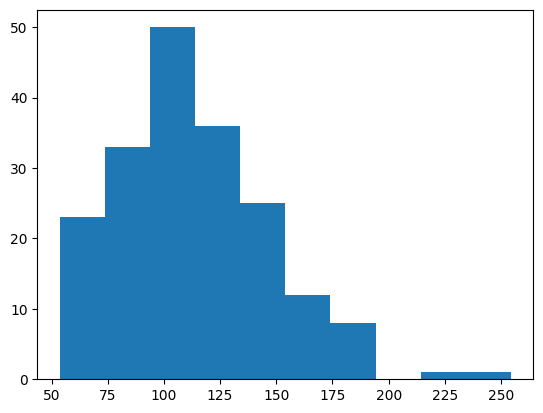

In [8]:
# Sanity check
import matplotlib.pyplot as plt

plt.hist(df['Tj'].to_numpy());

In [9]:
df.to_csv('./dataset/train.csv', index=False)